In [3]:
#Pythonで進めました
#Python3 環境..JupyterLab

import pandas as pd
from urllib import request
from bs4 import BeautifulSoup
import numpy as np

In [4]:
#課題1 
#下記のテーブル内容を取得し、「URL」を引数にとりテーブルをデータフレームとして出力する関数を作成して下さい。(コードを貼って下さい) 
def scrR(url):
    html = request.urlopen(url)
    soup = BeautifulSoup(html, 'html.parser')
    
    td = soup.findAll("td")
    th = soup.findAll("th")

    th_s = []
    td_s = []
    
    for i in range(len(th)):
      th_s.append(th[i].string)
    for i in range(len(td)):
      td_s.append(td[i].string)
    
    td_s = np.reshape(td_s, (120, 45)) # ここまだ一般化できる余地あり

    return pd.DataFrame(td_s, columns = th_s)


df = scrR("http://web.sfc.keio.ac.jp/~sk/ynl-r-homework.html")


In [5]:
#課題2
#課題1で出力されたデータフレームを 「日時」「天気」「気温」「アトラクション名」「待ち時間」 
#の５つのカラムで構成されるデータフレームに変換して下さい。(コードを貼って下さい)


df_2 = scrR("http://web.sfc.keio.ac.jp/~sk/ynl-r-homework.html")


df_changed = df_2[df_2.columns[3:45]]

#アトラクション名が入った配列を作成
atractions = []
for i in range(42):
    atr = [df_2.columns[i + 3]]*120
    atractions.extend(atr)
    #長さ120*42ね

#待ち時間が入った配列を作成
wait = []
for i in range(42):
    con = df_changed[df_changed.columns[i]]
    wait.extend(con)

#いらんとこ削除
for i in range(42):
    del df_2[df_2.columns[3]]

#atractions[], wait[]と合うようにdfの長さを調節
df_a = df_2

for i in range(41):
    df_2 = df_2.append(df_a)


#アトラクション名と待ち時間の配列をcancat()使って元のdfとくっつける
#元のdfじゃないやいらんとこ削除したやつや
df_2["アトラクション名"] = atractions
df_2["待ち時間"] = wait

df_2

,日時,天気,気温,アトラクション名,待ち時間
0,2018/5/27 15:30,晴,26.0,１.オムニバス,-
1,2018/5/28 15:30,曇,23.9,１.オムニバス,-
2,2018/5/29 15:30,晴,25.8,１.オムニバス,-
3,2018/5/30 15:30,曇,23.8,１.オムニバス,-
4,2018/5/31 15:30,曇,21.4,１.オムニバス,0
5,2018/6/1 15:30,曇,23.2,１.オムニバス,5
6,2018/6/2 15:30,晴,27.0,１.オムニバス,-
7,2018/6/3 15:30,晴,27.3,１.オムニバス,-
8,2018/6/4 15:30,晴,27.3,１.オムニバス,-
9,2018/6/5 15:30,晴,28.2,１.オムニバス,-


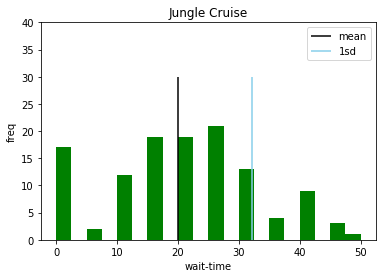

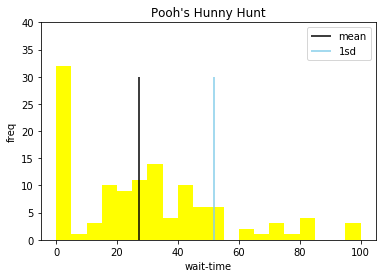

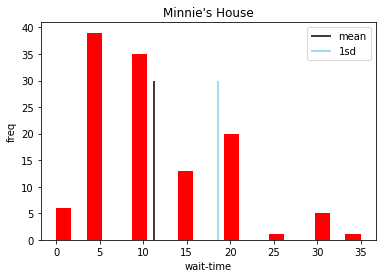

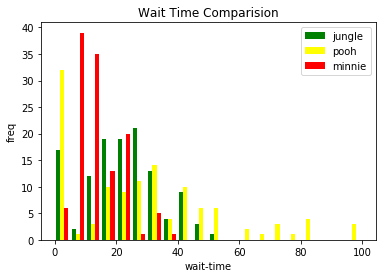

In [11]:
#課題3
#「ジャングルクルーズ」「プーさんのハニーハント」「ミニーの家」の待ち時間のヒストグラムを作図して下さい。 
#なお、平均と1SD値に補助線も引いて下さい。
#そもそも、、、度数・階級
#階級...今回は待ち時間

# なんか半透明に3つ並べてグラフを作れるらしいから余力あったらそれも試そう

# ４.ジャングルクルーズ
# １４.プーさんのハニーハント
# ２９.ミニーの家

import matplotlib.pyplot as plt

df_3 = scrR("http://web.sfc.keio.ac.jp/~sk/ynl-r-homework.html")

# 行/列指定でアトラクション別の待ち時間の値を引っ張ってくる
atr_jun = df_3["４.ジャングルクルーズ"].values
atr_pooh = df_3["１４.プーさんのハニーハント"].values
atr_minnie = df_3["２９.ミニーの家"].values

# ndarrayのままだとhist()との互換性がよろしくないのでlistに直します
atr_jun = atr_jun.tolist()
atr_pooh = atr_pooh.tolist()
atr_minnie = atr_minnie.tolist()


# よくわからない点...5分待ちがうまく表示されない。
# listの中が全部文字列だったから数値に直します
# 補助線引く観点でもこっちのがいいや
atr_jun = [0 if n =='-' else int(n) for n in atr_jun]
atr_pooh = [0 if n == '-' else int(n) for n in atr_pooh]
atr_minnie = [0 if n == '-' else int(n) for n in atr_minnie]

#平均値、1SD値をセット
jun_mean = np.mean(atr_jun)
pooh_mean = np.mean(atr_pooh)
minnie_mean = np.mean(atr_minnie)

jun_1sd = jun_mean + np.std(atr_jun)
pooh_1sd = pooh_mean + np.std(atr_pooh)
minnie_1sd = minnie_mean + np.std(atr_minnie)


# figure をセット
fig_jun = plt.figure().add_subplot(1, 1, 1)
fig_pooh = plt.figure().add_subplot(1, 1, 1)
fig_minnie = plt.figure().add_subplot(1, 1, 1)


# ジャングルクルーズ
fig_jun.hist(atr_jun, bins=20, color="green")
fig_jun.set_title('Jungle Cruise')
fig_jun.set_xlabel('wait-time')
fig_jun.set_ylabel('freq')
fig_jun.set_ylim([0,40])
fig_jun.vlines(x=jun_mean,ymin=0, ymax=30, label="mean")
fig_jun.vlines(x=jun_1sd, ymin=0, ymax=30, color="skyblue", label="1sd")
fig_jun.legend(loc='upper right')



# プーさんのハニーハント
fig_pooh.hist(atr_pooh, bins=20, color="yellow")
fig_pooh.set_title("Pooh's Hunny Hunt")
fig_pooh.set_xlabel('wait-time')
fig_pooh.set_ylabel('freq')
fig_pooh.set_ylim([0, 40])
fig_pooh.vlines(x=pooh_mean,ymin=0, ymax=30, label="mean")
fig_pooh.vlines(x=pooh_1sd, ymin=0, ymax=30, color="skyblue", label="1sd")
fig_pooh.legend(loc='upper right')


# ミニーの家　これが度数の最大値を取ったので比較しやすいように他もそれに合わせる（４０）
fig_minnie.hist(atr_minnie, bins=20, color="red")
fig_minnie.set_title("Minnie's House")
fig_minnie.set_xlabel('wait-time')
fig_minnie.set_ylabel('freq')
fig_minnie.vlines(x=minnie_mean,ymin=0, ymax=30, label="mean")
fig_minnie.vlines(x=minnie_1sd, ymin=0, ymax=30, color="skyblue", label="1sd")
fig_minnie.legend(loc='upper right')

# 全部のやつ（いちばん直感的に見れるのかな）
fig_all = plt.figure().add_subplot(1, 1, 1)
fig_all.hist([atr_jun, atr_pooh, atr_minnie], bins=20, color=['green', 'yellow', 'red'], label=['jungle', 'pooh', 'minnie'])
fig_all.legend(loc='upper right')
fig_all.set_title("Wait Time Comparision")
fig_all.set_xlabel('wait-time')
fig_all.set_ylabel('freq')

# この後のために関数化したいなぁ
def graphize(atr_name):
    
    df = scrR("http://web.sfc.keio.ac.jp/~sk/ynl-r-homework.html")
    atr = df[atr_name].values
    atr = atr.tolist()
    atr = [0 if n =='-' else int(n) for n in atr]
    fig = plt.figure().add_subplot(1, 1, 1)
    fig.hist(atr, bins=20, color="green")
    

    

In [7]:
#課題4. 「ビッグサンダーマウンテン」の待ち時間を予測する重回帰モデルを作成し、5月26日の待ち時間を予測して下さい。
#なお、予測に用いた説明変数も理由と共に明記して下さい。 5月26日は気温：22.8、晴です。

from sklearn import linear_model



def multi_re(ob_tmp, ob_clm, ob_date, atr_name):


    cls = linear_model.LinearRegression()

    df_4 = scrR("http://web.sfc.keio.ac.jp/~sk/ynl-r-homework.html")
    
    
    #引数を数値化
    if ob_clm =="晴":
        ob_clm_int = 1
    elif ob_clm == "曇":
        ob_clm_int = 2
    elif ob_clm == "小":
        ob_clm_int = 3
    elif ob_clm == "雨":
        ob_clm_int = 4
    else:
        ob_clm_int = 0
    
    
    
    if ob_date =="日":
        ob_date_int = 1
    elif ob_date =="月":
        ob_date_int = 2
    elif ob_date =="火":
        ob_date_int = 3
    elif ob_date =="水":
        ob_date_int = 4
    elif ob_date =="木":
        ob_date_int = 5
    elif ob_date =="金":
        ob_date_int = 6
    elif ob_date =="土":
        ob_date_int = 7



    # 説明変数に気温/天気/曜日を使用
    
    #気温を整理
    tmp = df_4.loc[:, ['気温']].as_matrix()
    tmp[119] = 0

    for n in range(len(tmp)):
        tmp[n] = float(tmp[n])


    # 天気を数値化
    
    clm = df_4.loc[:, ["天気"]].as_matrix()
    
    
    for i in range(len(clm)):
        if clm[i] == "晴":
            clm[i] = 1
        elif clm[i] == "曇":
            clm[i] = 2
        elif clm[i] == "小":
            clm[i] = 3
        elif clm[i] == "雨":
            clm[i] = 4
        else:
            clm[i] = 0
    
    #日時を利用
    date = df_4.loc[:, ["日時"]].as_matrix()
    #2018/5/27 は日曜日
    #曜日に変換
    
    for i in range(len(date)):
        if i % 7 == 0:
            date[i] = 1
        elif i % 7 == 1:
            date[i] = 2            
        elif i % 7 == 2:
            date[i] = 3            
        elif i % 7 == 3:
            date[i] = 4            
        elif i % 7 == 4:
            date[i] = 5
        elif i % 7 == 5:
            date[i] = 6            
        elif i % 7 == 6:
            date[i] = 7
    

    # 目的変数に待ち時間を使用
    atr = df_4[atr_name].as_matrix()
    atr = [0 if n =='-' else int(n) for n in atr]

    var = np.hstack([tmp, clm, date])

    cls.fit(var, atr)

    coef = cls.coef_
    intercept = cls.intercept_
    
    atr_wait = coef[0]*ob_tmp + coef[1]*ob_clm_int + coef[2]*ob_date_int + intercept
    
    atr_wait = int(atr_wait)
    
    print("気温:" + str(ob_tmp) + " 天気:" + ob_clm  + " (" + ob_date + ")" + " " + atr_name + "の予測待ち時間は 約" + str(atr_wait) + "分")
    
    
multi_re(ob_tmp=22.8, ob_clm="晴", ob_date = "土", atr_name="７.ビッグサンダー・マウンテン")


気温:22.8 天気:晴 (土) ７.ビッグサンダー・マウンテンの予測待ち時間は 約71分


In [8]:
#課題5. 5/26 15:30に乗るべきアトラクションは何ですか？乗るべきでないアトラクションは何ですか？

df_5 = scrR("http://web.sfc.keio.ac.jp/~sk/ynl-r-homework.html")

# それぞれで分析、待ち時間を算出。その後最低のものを選択
for i in range(42):
    multi_re(ob_tmp=22.8, ob_clm="晴", ob_date = "土", atr_name=df_5.columns[i + 3])


# 下記の解析結果より
    
#５.スイスファイミリーツリーハウス
#２７.チップとデールのツリーハウス
#２８.ドナルドのボート
#３５.グランドサーキット・レースウェイ
#３８.エントランスグリ（ベビーカー、車椅子レンタル側）
#３８.エントランスグリ（ベビーカー、車椅子レンタル側）

#上記6アトラクションが最短で乗ることができる。故に乗るべきである。

#１２.スプラッシュ・マウンテン の待ち時間が最長で約120分。故に乗るべきでない。

気温:22.8 天気:晴 (土) １.オムニバスの予測待ち時間は 約1分
気温:22.8 天気:晴 (土) ２.ウエスタンリバー鉄道の予測待ち時間は 約25分
気温:22.8 天気:晴 (土) ３.カリブの海賊の予測待ち時間は 約21分
気温:22.8 天気:晴 (土) ４.ジャングルクルーズの予測待ち時間は 約20分
気温:22.8 天気:晴 (土) ５.スイスファイミリーツリーハウスの予測待ち時間は 約0分
気温:22.8 天気:晴 (土) ６.魅惑のチキルーム：スティッチ・プレゼンツアロハ・エ・コモ・マイ！の予測待ち時間は 約10分
気温:22.8 天気:晴 (土) ７.ビッグサンダー・マウンテンの予測待ち時間は 約71分
気温:22.8 天気:晴 (土) ８.ウエスタンランド・シューティングギャラリーの予測待ち時間は 約16分
気温:22.8 天気:晴 (土) ９.カントリーベア・シアターの予測待ち時間は 約4分
気温:22.8 天気:晴 (土) １０.トムソーヤ島いかだの予測待ち時間は 約4分
気温:22.8 天気:晴 (土) １１.蒸気船マークトウェイン号の予測待ち時間は 約8分
気温:22.8 天気:晴 (土) １２.スプラッシュ・マウンテンの予測待ち時間は 約120分
気温:22.8 天気:晴 (土) １３.ビーバーブラザーズのカヌー探険の予測待ち時間は 約26分
気温:22.8 天気:晴 (土) １４.プーさんのハニーハントの予測待ち時間は 約45分
気温:22.8 天気:晴 (土) １５.ホーンテッドマンションの予測待ち時間は 約62分
気温:22.8 天気:晴 (土) １６.アリスのティーパーティーの予測待ち時間は 約43分
気温:22.8 天気:晴 (土) １７.イッツ・ア・スモールワールドの予測待ち時間は 約13分
気温:22.8 天気:晴 (土) １８.キャッスルカルーセルの予測待ち時間は 約17分
気温:22.8 天気:晴 (土) １９.シンデレラのフェアリーテイル・ホールの予測待ち時間は 約27分
気温:22.8 天気:晴 (土) ２０.ピノキオの冒険旅行の予測待ち時間は 約20分
気温:22.8 天気:晴 (土) ２１.ピーターパン空の旅の予測待ち時間は 約37分
気温:22.8 天気:晴 (土) ２２.ミッキーのフィルハーマジック

In [7]:
#課題6.　応用問題 5/26のにおいて「得点」を最大にする１日のモデルコースを提案して下さい。以下の拘束条件を守った上で、
#「各アトラクションの順番と各待ち時間」、「算出方法」、
#そして補足情報として予測した「全時間帯における各アトラクションの待ち時間」を説明して下さい。

#    拘束条件
#    1. 「特典」とは各アトラクション・レストランに設定されているクラスの合計値です
#    2. 同じアトラクションは乗らない(なおファストパスを使用した場合は通常の方法で2回目に乗車してもOK)
#    3. お昼、夜ご飯の時間は含み、それぞれ30分とする
#    4. 各アトラクション間の所要時間は全て15分と仮定します
#    5. ファストパスは1回発行すると、次の取得まで2時間後または次の乗車可能時刻以降です。
#    6. ファストパスの「取得」「使用」の2回を行程に含んでください。
#    7. 必ず行程には移動時間を含んで下さい。 


In [7]:
df_area_map = pd.read_csv("q6_area-map.csv")
df_facility = pd.read_csv("q6_facility-list.csv")
df_fp = pd.read_csv("q6_fp.csv")
df_May26 = pd.read_csv("q6_May26.csv")
df_rt = pd.read_csv("q6_rt.csv")
df_wt = pd.read_csv("q6_wt.csv")

In [ ]:
# ここで加点
# place がそのインスタンスが乗ったことのあるやつか調べる(アトラクションのリストを作る、乗ったことあるやつはリストから削除)
# place のrankを調べる
# rankによって何かに得点をつける



In [9]:
df_faci_dict = {}

df_facility[df_facility.columns[3]]
df_facility[df_facility.columns[5]]
for i in range(len(df_facility[df_facility.columns[3]])):
    df_faci_dict[df_facility[df_facility.columns[3]][i]] = df_facility[df_facility.columns[5]][i]

In [20]:
df_facility

,id,area,type,name,sub_name,class,Unnamed: 6
0,1,ワールドバザール,アトラクション,オムニバス,１.オムニバス,3,NaN
1,2,ワールドバザール,アトラクション,ペニーアーケード,NaN,3,NaN
2,3,アドベンチャーランド,アトラクション,ウエスタンリバー鉄道,２.ウエスタンリバー鉄道,7,NaN
3,4,アドベンチャーランド,アトラクション,カリブの海賊,３.カリブの海賊,7,NaN
4,5,アドベンチャーランド,アトラクション,ジャングルクルーズ：ワイルドライフ・エクスぺディション,４.ジャングルクルーズ,7,NaN
5,6,アドベンチャーランド,アトラクション,スイスファミリー・ツリーハウス,５.スイスファイミリーツリーハウス,3,NaN
6,7,アドベンチャーランド,アトラクション,魅惑のチキルーム：スティッチ・プレゼンツ “アロハ・エ・コモ・マイ！”,６.魅惑のチキルーム.スティッチ.プレゼンツアロハ.エ.コモ.マイ.,7,NaN
7,8,ウエスタンランド,アトラクション,ウエスタンランド・シューティングギャラリー,８.ウエスタンランド.シューティングギャラリー,3,NaN
8,9,ウエスタンランド,アトラクション,カントリーベア・シアター,９.カントリーベア.シアター,7,NaN
9,10,ウエスタンランド,アトラクション,蒸気船マークトウェイン号,１１.蒸気船マークトウェイン号,3,NaN
